<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/2_LM_Multiple_Regression_one_hot_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Library and Data :

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.linear_model import LinearRegression

In [5]:
startup= pd.read_csv("https://raw.githubusercontent.com/kjmobile/data/refs/heads/main/ml/startup.csv")
startup.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.30,136897.90,471784.20,New York,192261.93
1,1,162597.80,151377.69,443898.63,California,191792.16
2,2,153441.61,101145.65,407934.64,Florida,191050.49
3,3,144372.51,118671.95,383199.72,New York,182902.09
4,4,142107.44,91391.87,366168.52,Florida,166188.04


<Axes: xlabel='Marketing Spend', ylabel='Profit'>

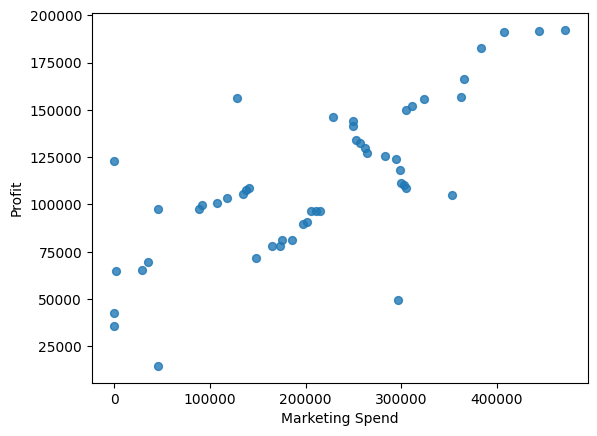

In [6]:
from matplotlib import pyplot as plt
startup.plot(kind='scatter', x='Marketing Spend', y='Profit', s=32, alpha=.8)

## 2 Check Data

In [7]:
startup.describe()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,Profit
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,73721.715600,121344.739600,211025.197800,112012.739200
std,14.57738,45902.256482,28017.802755,122290.310726,40306.180338
min,0.00000,0.100000,51283.240000,0.100000,14681.500000
25%,12.25000,39936.470000,103730.975000,129300.232500,90139.002500
50%,24.50000,73051.180000,122699.895000,212716.340000,107978.290000
75%,36.75000,101602.900000,144842.280000,299469.185000,139766.077500
max,49.00000,165349.300000,182645.660000,471784.200000,192261.930000


In [8]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       50 non-null     int64  
 1   R&D Spend        50 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            50 non-null     object 
 5   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.5+ KB


## 3 Preprocessing :
 - 1) one-hot encoding (cf. dummy variable)  
 - 2) train/test split

In [9]:
# One-hot encode on state column and save the data as startup_encoded
import pandas as pd
startup_encoded = pd.get_dummies(startup, columns=['State'])


In [10]:
startup_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50 non-null     int64  
 1   R&D Spend         50 non-null     float64
 2   Administration    50 non-null     float64
 3   Marketing Spend   50 non-null     float64
 4   Profit            50 non-null     float64
 5   State_California  50 non-null     bool   
 6   State_Florida     50 non-null     bool   
 7   State_New York    50 non-null     bool   
dtypes: bool(3), float64(4), int64(1)
memory usage: 2.2 KB


In [11]:
startup_encoded.columns

Index(['Unnamed: 0', 'R&D Spend', 'Administration', 'Marketing Spend',
       'Profit', 'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [12]:
startup_encoded.head(3)

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,0,165349.30,136897.90,471784.20,192261.93,False,False,True
1,1,162597.80,151377.69,443898.63,191792.16,True,False,False
2,2,153441.61,101145.65,407934.64,191050.49,False,True,False


In [13]:
startup_encoded.columns !='Profit'

array([ True,  True,  True,  True, False,  True,  True,  True])

In [14]:
# what does this code do?
X=startup_encoded.loc[:, startup_encoded.columns!='Profit']
y=startup_encoded['Profit']

In [15]:
X.head(2)

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,0,165349.3,136897.90,471784.20,False,False,True
1,1,162597.8,151377.69,443898.63,True,False,False


In [ ]:
y.head(2)

,Profit
0,192261.93
1,191792.16


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# how much percent of data is being using for training?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## 4 Modeling

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

Note: In this example, we took only machine learning approach aiming for predictive performance.
For interpretability and coefficient estimation in linear models, we must omit one dummy to avoid multicorelinarity;
For predictive performance in models, including all dummies, as we do here, might be acceptable.

## 5 Prediction

In [37]:
pred = model.predict(X_test)
pred

array([100816.26253313, 140421.18291306, 140326.44377033,  69222.24281516,
       176069.65437658, 112270.8920814 ,  72123.24325057,  95713.96040831,
       116088.9380738 , 167708.0310573 ])

## 6 Evaluating the model

In [38]:
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})

In [ ]:
comparison

,actual,pred
28,103282.48,100816.262533
11,144259.50,140421.182913
10,146122.05,140326.443770
41,77798.93,69222.242815
2,191050.49,176069.654377
27,105008.41,112270.892081
38,81229.16,72123.243251
31,97483.66,95713.960408
22,110352.35,116088.938074
4,166188.04,167708.031057


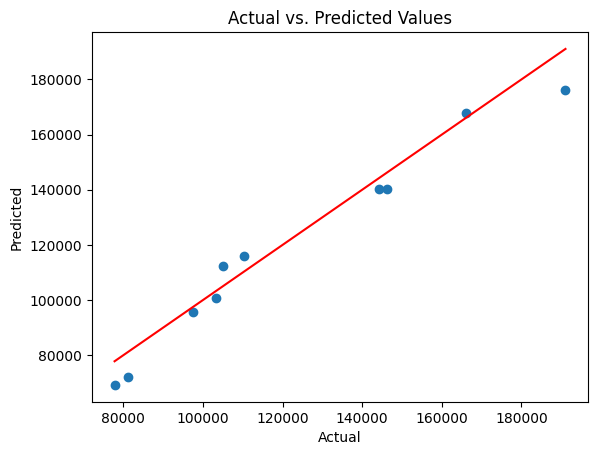

In [39]:
# Compare actual v. predicted with line vs. scatter comparsion

# Plot the actual and predicted values
plt.scatter(y_test, pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Values")

# Add a line for the perfect fit
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")

# Show the plot
plt.show()


In [40]:
from sklearn.metrics import mean_squared_error


In [41]:
mse=mean_squared_error(y_test, pred)  #mean squared error
mse

52640097.528340004

In [42]:
rmse= mse ** 0.5   #root mean squared error
rmse

7255.349580023006

In [43]:
model.score(X_train, y_train) # r-squared on train set

0.9576940553228058

In [44]:
model.score(X_test, y_test) # r-squared on test set  : 1) which r-squared is more important? 2) are they the same as statmodels' r-squared?

0.9588392809708515

---